**ÍNDICE DE CONTENIDOS**

1. [Ejercicio 1: Problema de regresión múltiple para predecir la probabilidad de abandono de un banco](#topic1)
2. [Ejercicio 2: Problema de clasificación multiclase de diferentes especies de flores](#topic2)
3. [Ejercicio 3: Problema de clasificación multiclase de diferentes artículos de ropa y calzado](#topic3)



# 01 Ejercicio: Problema de modelización de la pérdida de clientes  <a id="topic1"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio tomaremos como punto de partida el caso visto en el Notebook '02_Introducción a las RNA en TensorFlow 2.0'. Partiendo del mismo conjunto de datos, una muestra de 10.000 clientes, programar una estructura de red neuronal artificial con 4 capas ocultas y 3 capas dropout utilizando el proceso de validación cruzada k-fold en la etapa de entrenamiento con el objetivo de identificar si tenemos problemas de sesgo y/o varianza. El resto de parámetros son los que aparecen fijados aunque podéis modificarlos para ver cómo varían los resultados.

Recordad que las fases básicas para implementar dicho algoritmo de aprendizaje profundo son las siguientes:

1. Procesado datos entrada red neuronal artificial
2. Definición del modelo de red neuornal artificial
3. Configuración del proceso de aprendizaje de una RNA
4. Entrenamiento del modelo de red neuronal artificial
5. Evaluación del modelo de red neuronal artificial

**01 Solución ejercicio: Problema de modelización de la pérdida de clientes**

In [ ]:
# Tenemos que instalar unas dependencias previamente (tenemos que hacerlo en cada sesión que queramos utilizar la librería scikeras)
!python -m pip install scikeras

In [1]:
# Importamos las librerías necesarias para realizar dicho ejercicio
import keras
import scikeras
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Sincronizamos Google Colab con Google Drive

try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception:
    print("No estás en el entorno de Google Colab.")

No estás en el entorno de Google Colab.


In [3]:
# Cargamos el conjunto de datos
dataset = pd.read_csv('./Churn_Modelling.csv')

In [4]:
# Definimos las variables independientes
x = dataset.iloc[:, 3:13].values


In [5]:
# Definimos la variable que queremos explicar (dependiente)
y = dataset.iloc[:, 13].values
print(dataset['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [6]:
# Realizamos la transformación para cada una de las variables que nos interesan
# Transformación de la columna 1 (país) en variable dummy
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])

# Comprobamos que se ha realizado correctamente
x

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
# Cuando estamos considerando más de 3 categorías y queremos crear variables dummmies
# para no caer en problemas de multicolinealidad debido al exceso de variables creadas artificialmente
# tenemos que eliminar siempre 1 columna. Para ello utilizaremos las funciones OneHotEncoder y ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

x = transformer.fit_transform(x) # aplicamos la función transformer
x = x[:, 1:] # eliminamos la columna 1º

# Comprobamos que se ha realizado correctamente
x[:, 0:3]

array([[0.0, 0.0, 619],
       [0.0, 1.0, 608],
       [0.0, 0.0, 502],
       ...,
       [0.0, 0.0, 709],
       [1.0, 0.0, 772],
       [0.0, 0.0, 792]], dtype=object)

In [8]:
# Transformación de la columna 2 (género) en variable dummy
labelencoder_x_2 = LabelEncoder()
x[:, 3] = labelencoder_x_2.fit_transform(x[:, 3])

In [9]:
# Definimos los conjuntos de train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

Forma de x_train: (8000, 11)
Forma de y_train: (8000,)


### Estandarízación

In [11]:
# Estandarizamos las variables con la función StandardScaler
sc_x = StandardScaler()

# Variables independientes entrenamiento estandarizadas
x_train = sc_x.fit_transform(x_train)


In [12]:
# Variables independientes testing estandarizadas
x_test = sc_x.transform(x_test)

In [13]:

# Averiguamos el número de features para definir la capa de entrada
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)

Forma de x_train: (8000, 11)
Forma de y_train: (8000,)


In [14]:

#TODO Creamos una función para implementar la estructura de RNA con:
"""
-4 capas ocultas
-3 capas de dropout
-Proceso de validación cruzada k-fold en la etapa de entrenamiento
para identificar si hay problemas de sesgo o varianza.
"""

def build_rna():

    """
    ¿Qué utilizas y por qué?
    RESPONDER AQUÍ
    """
    # Inicializamos la RNA con la función Sequential
    rna = Sequential()

    #! Puesto que tenemos 11 features, añadimos 10 nodos en la capa de entrada
    rna.add(Dense(units = 11, kernel_initializer = "uniform", activation = "relu", input_dim = 11))

    # Añadimos una segunda capa oculta
    rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

    # Añadimos una primera capa de dropout
    rna.add(Dropout(0.05))

    # Añadimos una tercera capa oculta
    rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

    # Añadimos una segunda capa de dropout
    rna.add(Dropout(0.1))

    # Añadimos una cuarta capa oculta
    rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

    # Añadimos una tercera capa de dropout
    rna.add(Dropout(0.15))

    #! Un solo nodo para  la salida y activación sigmoide al ser una clasificación binaria
    rna.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

    # Cambiamos las métricas de optimización para que tenga encenta la precisión y la sensibilidad.
    rna.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy", "Recall", "Precision"])

    # Devolver la RNA
    return rna

In [15]:
# Preparamos la RNA al conjunto de entrenamiento para poder utilizar el k-fold cv
rna = KerasClassifier(build_fn = build_rna, batch_size = 50, epochs = 100)

In [33]:

#! SOLAMENTE NOS DA DE MÉTRICA EL ACCURACY 
# accuracies = cross_val_score(
#     estimator=rna, 
#     X = x_train, y = y_train, 
#     cv = 10, 
#     n_jobs=-1, 
#     verbose = 1)

#accuracies
# accuracy = accuracies.mean()
# variance = accuracies.std()

# print("Media del accuracy: ", accuracy) # sesgo / bias 
# print("Varianza", variance) # varianza 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.8min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


In [16]:

# Realizamos la validación cruzada con múltiples métricas
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Esta es la validación cruzada con K-fold
scores = cross_validate(
    estimator=rna, 
    X=x_train, y=y_train, 
    cv=10, 
    scoring=scoring, 
    n_jobs=-1, 
    verbose=1
)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.3min remaining:   50.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.7min finished


In [19]:
# Dataframe para almacenar los resultados
results = pd.DataFrame(columns=['Accuracy', 'Variance', 'Precision',  'Recall', 'F1'])

La validación cruzada de scores (cross_validate) nos devuelve un diccionario donde cada clave del diccionario
contendrá un array con tantos índices como pliegues le hayamos indicado dentro del cv. 

Para obtener las métricas de validación, será necesario calcular la media o la desviación estándar de cada clave.

In [61]:


accuracy = scores['test_accuracy'].mean()
variance = scores['test_accuracy'].std()
precision = scores['test_precision'].mean()
recall = scores['test_recall'].mean()
f1 = scores['test_f1'].mean()

# Crear un DataFrame con la nueva fila de resultados
new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'F1': [f1],
    'Recall': [recall]
})

# Concatenar el nuevo DataFrame al anterior
results = pd.concat([results, new_row], ignore_index=True)

# Mostrar el DataFrame resultante
results

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_18144\3561125114.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


,Accuracy,Variance,Precision,Recall,F1
0,0.82875,0.017509,0.565728,0.277061,0.368672


In [54]:
scores

{'fit_time': array([65.06499696, 67.51544499, 66.60687423, 65.6474402 , 66.23088002,
        65.84990072, 64.59026408, 62.60557389, 27.51456475, 25.8519032 ]),
 'score_time': array([0.96242857, 0.15259123, 0.21542287, 0.84074998, 0.27526402,
        0.51262712, 0.52060843, 0.52758837, 0.15159583, 0.12669921]),
 'test_accuracy': array([0.845  , 0.8375 , 0.82625, 0.83375, 0.8325 , 0.79625, 0.83625,
        0.8475 , 0.8375 , 0.795  ]),
 'test_precision': array([0.76      , 0.68131868, 0.72222222, 0.72058824, 0.70422535,
        0.        , 0.7       , 0.68807339, 0.68085106, 0.        ]),
 'test_recall': array([0.34969325, 0.3803681 , 0.2392638 , 0.3006135 , 0.30674847,
        0.        , 0.34355828, 0.4601227 , 0.3902439 , 0.        ]),
 'test_f1': array([0.4789916 , 0.48818898, 0.359447  , 0.42424242, 0.42735043,
        0.        , 0.46090535, 0.55147059, 0.49612403, 0.        ])}

### Sesgo/bias y varianza

1. Si el modelo tiene un alto sesgo (es decir, el accuracy es bajo) (lo que significa que tiene un error de entrenamiento alto), esto podría sugerir que tu modelo es demasiado simple y no puede capturar la complejidad de los datos. Esto se conoce como underfitting. Esto sucedería si en la media del accuracy tuviésemos un valor bajo, como del 0.70 o 0.60.

2. Si tu modelo tiene una alta varianza (lo que significa que tiene una gran diferencia entre el error de entrenamiento y el error de prueba), esto podría sugerir que tu modelo es demasiado complejo y está capturando el ruido en los datos de entrenamiento. Esto se conoce como overfitting. Cuánto más alta sea la varianza, más es la distancia que hay entre el valor de la predicción y el valor real.


In [ ]:
"""
Hasta aquí las métricas parecen bastante buenas.... ¿Pero realmente están interpretando bien los datos? 
A partir de este punto tenemos que evaluar lo siguiente:
-Recall
-Precision
-F1-Score
"""

### Obtención "manual" de las métricas (CM Y ROC)

A partir de aquí, en lugar de obtern las métricas con la función cross_Validate, vamos a hacerlo de forma manaul para sacar también la matriz de confusión y la curva de ROC.

1. Precisión (precision): De todos los que fueron predichos como positivos, ¿cuántos realmente lo son?
2. Recall (sensibilidad): De TODOS los positivos del modelo, ¿cuántos fueron caputrados como positivos?
3. F1: La media de una cosa y la otra. Es decir, la media armónica entre la precisión y el recall.

In [17]:

# Entrenamos el modelo
rna.fit(x_train, y_train)

# Hacemos las predicciones sobre los datos de prueba
y_pred = rna.predict(x_test)

# Convertimos las predicciones y los datos reales a un formato adecuado
y_pred = np.array(y_pred).flatten()
y_test = np.array(y_test).flatten()



Epoch 1/100


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.2500 - Recall: 0.0249 - accuracy: 0.7892 - loss: 0.6760
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7967 - loss: 0.4773
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7937 - loss: 0.4550
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7965 - loss: 0.4430
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7995 - loss: 0.4323
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7896 - loss: 0.4448
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8013 - loss: 0.4225
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+0

In [20]:
accuracy = accuracy_score(y_test, y_pred)
variance = np.var(y_pred)

precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

# Crear un DataFrame con la nueva fila de resultados
new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'F1': [f1],
    'Recall': [recall]
})

# Concatenar el nuevo DataFrame al anterior
results = pd.concat([results, new_row], ignore_index=True)

# Mostrar el DataFrame resultante
results

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_10544\3033418912.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


,Accuracy,Variance,Precision,Recall,F1
0,0.8535,0.131664,0.679487,0.523457,0.591353


El modelo tiene claros problemas para identificar positivos (es decir, los que van a marcharse, esto nos obliga a corregir la estructura de la red neuronal para mejorar la precisión y el recall.) Como solución, en las métricas de optimización vamos a introducir el recall y la precisión.

[[1495  100]
 [ 193  212]]


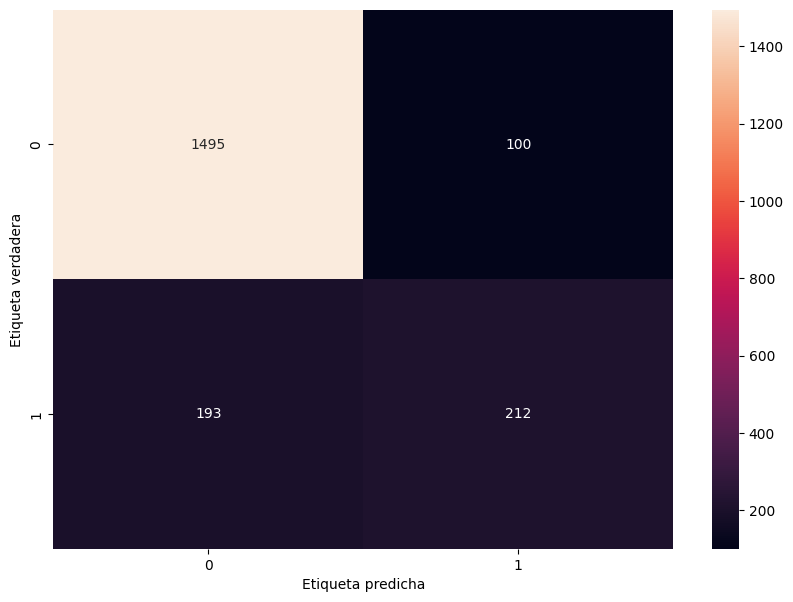

In [21]:


# Crea la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Visualiza la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

### Curva de ROC

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
AUC: 0.8566229343240839


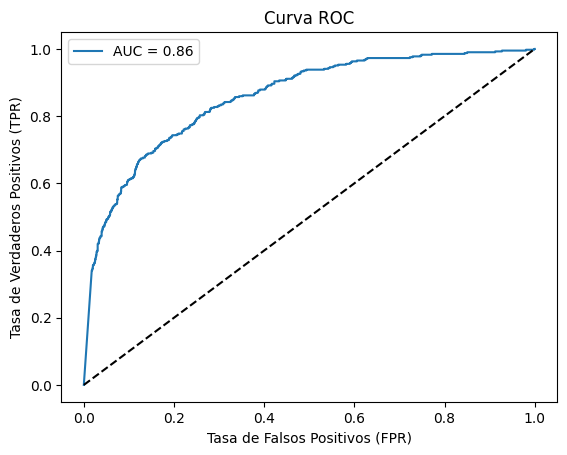

In [22]:
# Predicciones probabilísticas
y_pred_proba = rna.predict_proba(x_test)[:, 1]

# Cálculo de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Cálculo del AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

# Gráfico de la curva ROC
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia (clasificación aleatoria)
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="best")
plt.show()

### Gráfica de pérdida / Loss Plot

In [25]:
# Inicializamos la RNA con la función Sequential
rna = Sequential()

#! Puesto que tenemos 11 features, añadimos 10 nodos en la capa de entrada
rna.add(Dense(units = 11, kernel_initializer = "uniform", activation = "relu", input_dim = 11))

# Añadimos una segunda capa oculta
rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

# Añadimos una primera capa de dropout
rna.add(Dropout(0.05))

# Añadimos una tercera capa oculta
rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

# Añadimos una segunda capa de dropout
rna.add(Dropout(0.1))

# Añadimos una cuarta capa oculta
rna.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

# Añadimos una tercera capa de dropout
rna.add(Dropout(0.15))

#! Un solo nodo para  la salida y activación sigmoide al ser una clasificación binaria
rna.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

# Cambiamos las métricas de optimización para que tenga encenta la precisión y la sensibilidad.
rna.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy", "Recall", "Precision"])



c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.2791 - Recall: 0.0403 - accuracy: 0.7814 - loss: 0.6707 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.4538
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8003 - loss: 0.4569 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.4360
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7925 - loss: 0.4481 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.4315
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8002 - loss: 0.4325 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7975 - val_loss: 0.4280
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - 

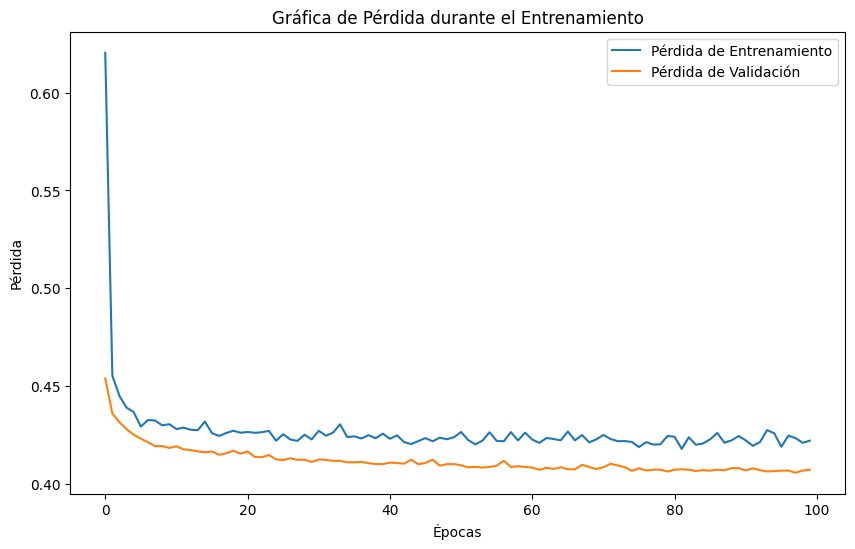

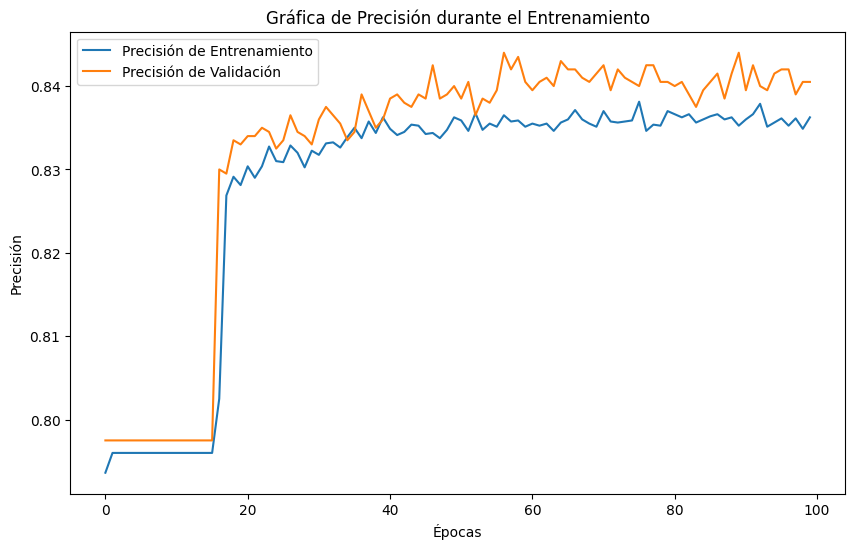

In [28]:
history = rna.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=50)

# Graficar la pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Gráfica de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Gráfica de Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [32]:
results = rna.evaluate(x_test, y_test)
print(f'Pérdida: {results[0]}')
print(f'Precisión: {results[1]}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.7828 - Recall: 0.3434 - accuracy: 0.8431 - loss: 0.3981
Pérdida: 0.4072895348072052
Precisión: 0.840499997138977


# 02 Ejercicio: Problema de clasificación multiclase de diferentes especies de flores <a id="topic2"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio utilizaremos el conjunto de datos de flores denominado *iris* que utilizamos también en la asignatura de análisis estadístico. Este conjunto de datos está bien estudiado y es un buen problema para practicar con redes neuronales ya que las 4 variables de entrada son numéricas y tienen la misma escala en centímetros. Cada observación describe las propiedades de las medidas de una flor observada y la variable de salida será la especie específica de iris.

Se trata de un problema de clasificación multiclase, lo que significa que hay más de dos clases que predecir, de hecho, vamos a considerar tres especies de flores. Se trata de un tipo de problema importante en el que practicar con redes neuronales porque los valores de las tres clases requieren un manejo especializado. El objetivo será proponer la estructura de una red neuronal artificial que proporcione una precisión elevada del conjunto de prueba (> 85%).

**02 Solución ejercicio: Problema de clasificación multiclase de diferentes especies de flores**

In [ ]:
# Tenemos que instalar unas dependencias previamente (tenemos que hacerlo en cada sesión que queramos utilizar la librería scikeras)
!python -m pip install scikeras

In [2]:
# Importamos las librerías necesarias para realizar dicho ejercicio
import scikeras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
# Sincronizamos Google Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Cargamos el conjunto de datos
dataset = pd.read_csv('./iris.csv')

In [4]:
# Definimos las variables independientes
x = dataset.iloc[:, 0:4].values

# Comprobamos que hemos realizado correctamente la selección
print("x: ", x)
print("x ndim: ", x.ndim)
print("x shape:", x.shape)
print("x size: ", x.size)
print("x dtype: ", x.dtype)

x:  [[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.

In [5]:
# Definimos la variable dependiente
y = dataset.iloc[:, 4].values

# Comprobamos que hemos realizado correctamente la selección
print("y: ", y)
print("y ndim: ", y.ndim)
print("y shape:", y.shape)
print("y size: ", y.size)
print("y dtype: ", y.dtype)

y:  ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-ve

In [6]:
# Codificamos los valores de la clase como enteros
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [107]:
# Convertimos los enteros en variables ficticias
dummy_y = np_utils.to_categorical(encoded_y)

# Comprobamos que hemos realizado correctamente la selección
print("dummy_y: ", dummy_y)
print("dummy_y ndim: ", dummy_y.ndim)
print("dummy_y shape:", dummy_y.shape)
print("dummy_y size: ", dummy_y.size)
print("dummy_y dtype: ", dummy_y.dtype)

dummy_y:  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1

In [109]:
# Definimos la arquitectura del modelo de RNA
def base_model():
    """
    ¿Qué utilizas y por qué?

    -Tenemos 4 variables independientes, así que hay 4 nodos de entrada.
    
    -En las capas intermedias comenzamos usando 4 nodos (la media entre la entrada y la salida).

    -Comenzamos sin ninguna capa oculta para ver cómo se comporta el modelo. En caso de overfitting, añadiríamos alguna de dropout.

    -En la capa de salida hay 3 posibles categorías, así que solo necesitamos 3 nodos.
    
    -Este no es un problema de clasificación binario como el anterior, así que utilizamos softmax en lugar de la sigmoide.
    En caso de usar la sigmoide, no podríamos garantizar que los pesos de cada categoría sumen 1. La softmax nos garantiza esto.


    -El dataset de iris está muy balanceado (todo lo contrario que el ejercicio anterior), así que en un principio no sería necesario incluir 
    la sensabilidad y la precisión. Aún así, y solamente para evaluar, se ha decidido incluir.
    """
    rna = Sequential()
    rna.add(Dense(units = 4, input_dim=4, activation='relu'))
    rna.add(Dense(units = 4, activation='relu'))
    rna.add(Dense(units = 4, activation='relu'))
    rna.add(Dense(units = 3, activation='softmax'))
    rna.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy", "Recall", "Precision"])
    return rna

In [173]:
# Realizamos la fase de entrenamiento con k-fold cv (k=10)
model = KerasClassifier(build_fn = base_model, batch_size = 5, epochs = 100)

### Número de pliegues

El dataset de Iris, como podemos ver, solamente tiene 150 muestras. Esto puede ser insuficiente y ha resultado ser especialmente conflictivo a la hora de aplicar el crossvalidation. Para disminuir este efecto, se ha reducido el número de pliegues a solamente 3. Eso sí, las mejores predicciones se realizan cuando no hay una validaciónc ruzada como tal, sino que directamente se hace la comprobación con el conjunto de test.

In [194]:
#Aquí podemos ver que quizás no hay suficientes datos para hacer demasiados pliegues
x.shape

(149, 4)

In [183]:
# Hacmeos la validación con solo 3 pliegues
results = cross_val_score(model, x, dummy_y, cv=3)

Epoch 1/100


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3607 - loss: 1.1005
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4261 - loss: 1.0937 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4425 - loss: 1.0850 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4542 - loss: 1.0886 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3780 - loss: 1.0871 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4002 - loss: 1.0674 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.1071 - Recall: 0.0016 - accuracy: 0.3933 - loss: 1.0327         
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.8966 - Recall: 0.0929 - accura

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3072 - loss: 1.0990
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4239 - loss: 1.0974
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3855 - loss: 1.0974 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3471 - loss: 1.0963  
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3344 - loss: 1.0967 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3028 - loss: 1.0936 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4197 - loss: 1.0918 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2960 - loss: 1.1372
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3551 - loss: 1.1220 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2363 - loss: 1.1087 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2256 - loss: 1.0927     
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3298 - loss: 1.0882 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2962 - loss: 1.0880 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3884 - loss: 1.0798 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.2938 - Recall: 0.2938 - accuracy: 0.2938 - loss: 2.4131
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3403 - Recall: 0.3403 - accuracy: 0.3403 - loss: 1.7563 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.2753 - Recall: 0.2753 - accuracy: 0.2753 - loss: 1.4968 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3060 - Recall: 0.2886 - accuracy: 0.2886 - loss: 1.2746 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.4455 - Recall: 0.2822 - accuracy: 0.3300 - loss: 1.1404 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.1386 - Recall: 0.0567 - accuracy: 0.6111 - loss: 1.0702         
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5564 - Recall: 0.1871 - accuracy: 0.6193 - loss: 0.9979         
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 1.0000 - Recall: 0.3789 - accuracy: 0.6756 - loss: 0.8786 
Epoch 9/100
2

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1973 - loss: 1.1553     
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2549 - loss: 1.1128 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2378 - loss: 1.1196     
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2745 - loss: 1.1054     
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3631 - loss: 1.1009 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2399 - loss: 1.1002 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1357 - loss: 1.1011     
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Re

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.1874 - loss: 1.1718  
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6553 - loss: 1.0143 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6116 - loss: 0.9612 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.8214 - Recall: 0.1230 - accuracy: 0.5948 - loss: 0.9132         
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.9643 - Recall: 0.3293 - accuracy: 0.5952 - loss: 0.8647         
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 1.0000 - Recall: 0.3758 - accuracy: 0.7406 - loss: 0.7902 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 1.0000 - Recall: 0.4073 - accuracy: 0.9900 - loss: 0.7218 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 1.0000 - Recall: 0.4010 - accuracy: 0.9168 - l

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3167 - loss: 1.0987
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3518 - loss: 1.0985 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3556 - loss: 1.0986 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3354 - loss: 1.0986 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3315 - loss: 1.0983     
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3688 - loss: 1.0976 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3899 - loss: 1.0963 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.3688 - Recall: 0.3688 - accuracy: 0.3688 - loss: 3.0219
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3754 - Recall: 0.3698 - accuracy: 0.3706 - loss: 2.0733 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.3161 - Recall: 0.2184 - accuracy: 0.3040 - loss: 1.8274 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0567 - Recall: 0.0281 - accuracy: 0.1589 - loss: 1.5625 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.0078 - loss: 1.2801     
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3309 - loss: 1.0883 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4155 - loss: 1.0390 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4780 - loss: 1

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3737 - loss: 1.2177
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3552 - loss: 1.1043 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3096 - loss: 1.1090     
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5785 - loss: 1.0832 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5830 - loss: 1.0719 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4506 - loss: 1.0530 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4934 - loss: 1.0475 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - Precision: 0.2157 - Recall: 0.1814 - accuracy: 0.3009 - loss: 1.3741
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2614 - loss: 1.2436 
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3026 - loss: 1.1305 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2960 - loss: 1.0464 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3673 - loss: 1.0267 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6793 - loss: 0.9657 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7073 - loss: 0.9629 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.9643 - Recall: 0.0209 - accuracy: 0.79

In [184]:
accuracy = results.mean()*100
variance = results.std()*100

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))




Baseline: 71.29% (40.53%)


### Evaluación de métricas con Cross Validate 

In [185]:
resultados = pd.DataFrame(columns=['Accuracy', 'Variance', 'Precision', 'Recall', 'F1'])


In [ ]:
scoring = {
    'precision': 'precision_macro',  
    'recall': 'recall_macro',         
    'f1': 'f1_macro',                 
}

results = cross_validate(model, x, dummy_y, cv=3, scoring=scoring)

In [187]:

precision = results['test_precision'].mean()
recall = results['test_recall'].mean()
f1 = results['test_f1'].mean()

new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'Recall': [recall],
    'F1': [f1]
})

resultados = pd.concat([resultados, new_row], ignore_index=True)
resultados = resultados.round(2)


resultados

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_8416\1210053740.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, new_row], ignore_index=True)


,Accuracy,Variance,Precision,Recall,F1
0,71.29,40.53,0.27,0.25,0.26


### Matriz de confusión y validación "manual"

El accuracy es bastante alto, pero la precisión y el recall (0.366667	0.351111) hacen sospechar que algo no va bien. Vamos a hacer una validación más manual con matriz de confusión para ver qué sucede.

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size = 0.2, random_state = 0)


In [189]:

# Entrenamos
model.fit(x_train, y_train, epochs=100, batch_size=10)

# Hacemos las predicciones sobre los datos de prueba
y_pred = model.predict(x_test)



Epoch 1/100


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.3729 - loss: 1.0500
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5648 - loss: 1.0391 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6223 - loss: 1.0377 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6097 - loss: 1.0142 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6429 - loss: 1.0109  
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.2308 - Recall: 0.0020 - accuracy: 0.6570 - loss: 0.9906         
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 1.0000 - Recall: 0.0743 - accuracy: 0.6925 - loss: 0.9601 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 1.0000 - Recall: 0.2447 - accuracy: 0.6

In [190]:
# Convertimos las predicciones y los datos reales a un formato adecuado
y_pred_flatten = np.array(y_pred).flatten()
y_test_flatten = np.array(y_test).flatten()

In [169]:
accuracy = accuracy_score(y_test_flatten, y_pred_flatten)
variance = np.var(y_pred_flatten)

precision = precision_score(y_test_flatten, y_pred_flatten, zero_division=1)
recall = recall_score(y_test_flatten, y_pred_flatten, zero_division=1)
f1 = f1_score(y_test_flatten, y_pred_flatten, zero_division=1)

# Crear un DataFrame con la nueva fila de resultados
new_row = pd.DataFrame({
    'Accuracy': [accuracy],
    'Variance': [variance],
    'Precision': [precision],
    'F1': [f1],
    'Recall': [recall]
})

resultados = pd.concat([resultados, new_row], ignore_index=True)
resultados = resultados.round(2)


resultados

,Accuracy,Variance,Precision,Recall,F1
0,0.79,0.33,NaN,NaN,NaN
1,0.98,0.22,0.97,0.97,0.97
2,0.51,0.22,0.27,0.27,0.27
3,0.51,0.22,0.27,0.27,0.27
4,1.00,0.22,1.00,1.00,1.00
5,1.00,0.22,1.00,1.00,1.00
6,0.98,0.22,0.97,0.97,0.97
7,0.98,0.22,0.97,0.97,0.97
8,0.98,0.22,0.97,0.97,0.97


### Visualización del sesgo

Uno de los desafíos de este ejercicio es tener resultados fiables con un conjunto de validación tan pequeño. Aún así, procedemos a realizar una matriz de confusión para ver cuántos ha clasificado correctamente y dónde podría estar el sesgo. 

En las primeras versiones del código, la matriz de confusión tenía el siguiente aspecto:

[[12  0  0]
 [ 0  0 10]
 [ 0  0  8]]

Esta matriz revela que efectivamente puede clasificar bien la etiquetas 0 y 2 (setosa y virginica). Sin embargo es incapaz de detectar la versicolor y la clasifica como virginica. Esto nos lleva a pensar que el modelo tiene un sesgo hacia la clase virginica.

In [191]:
print(x_test.shape, y_test.shape,  y_pred.shape, x_test.shape)

(30, 4) (30, 3) (30, 3) (30, 4)


In [192]:

# Si y_pred son probabilidades, convertimos a etiquetas
y_pred = np.argmax(y_pred, axis=1)

# Asegúrate de que y_test esté en el mismo formato
y_test = np.argmax(y_test, axis=1)  # Esto solo si y_test también está en formato One-Hot

# Verificar los valores únicos
print("Clases únicas en y_pred:", np.unique(y_pred))
print("Clases únicas en y_test:", np.unique(y_test))

Clases únicas en y_pred: [0 1 2]
Clases únicas en y_test: [0 1 2]


[[12  0  0]
 [ 0 10  0]
 [ 0  2  6]]


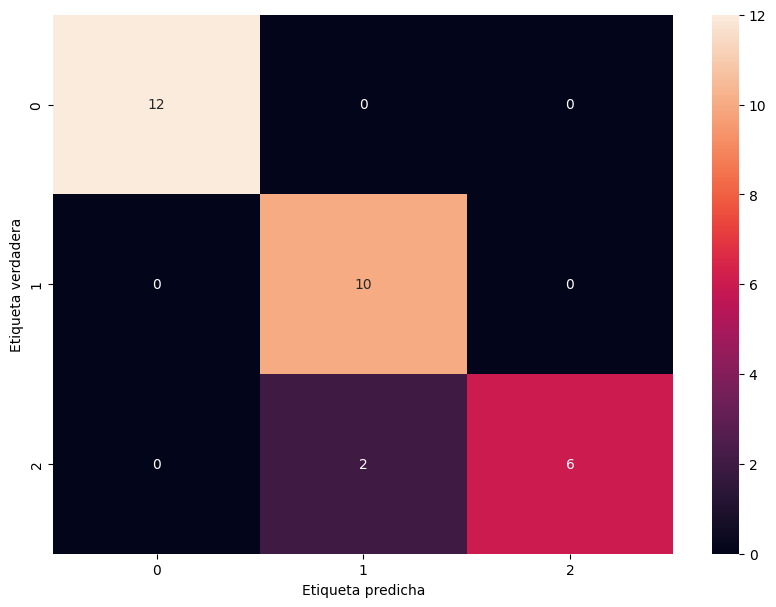

In [193]:


# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualización de la matriz
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()

**Nota.** La capa de salida debe crear 3 valores de salida, uno para cada clase. El valor de salida con el mayor valor se tomará como la clase predicha por el modelo. Los resultados se resumen como la media y la desviación estándar de la precisión del modelo en el conjunto de datos utilizando la validación cruzada. Como podemos observar, hemos obtenido unos resultados muy buenos ya que hemos obtenido precisión (poco sesgo) y la varianza es pequeña.

**Nota 2.** Los resultados pueden variar debido a la naturaleza estocástica del algoritmo o del procedimiento de evaluación, o a las diferencias en la precisión numérica. Considerad la posibilidad de ejecutar el ejercicio varias veces y comparad el resultado medio.

# 03 Ejercicio: Problema de clasificación multiclase de diferentes artículos de ropa y calzados <a id="topic3"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

En este ejercicio utilizaremos el conjunto de datos de *Fashion-MNIST* que viene precargado en la librería de Keras. Os dejo el enlace al repositorio de GitHub [https://github.com/zalandoresearch/fashion-mnist](https://github.com/zalandoresearch/fashion-mnist).

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando, una tienda de moda online alemana especializada en venta de ropa y zapatos. EL conjunto de datos contiene 70000 imágenes en escala de grises en 10 categorías. Las imágenes muestran prendas individuales de ropa en baja resolución (28x28 píxeles). Se van a utilizar 60000 imágenes para entrenar la red y 10000 imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes.

Por tanto, se trata de un problema de clasificación multiclase, lo que significa que hay más de dos clases que predecir, de hecho, vamos a considerar diez clases de artículos de ropa. El objetivo será proponer la estructura de una red neuronal de convolución que proporcione una precisión elevada del conjunto de prueba (> 80%). En el caso de que no se alcance en la primera aproximación tendréis que tomar medidas para mejorar el proceso de diseño y entrenamiento de la red en cuestión hasta alcanzar dicho objetivo.

**03 Solución ejercicio: Problema de clasificación multiclase de diferentes artículos de ropa y calzados**

Veamos paso a paso como resolvemos dicho ejercicio.

**Paso 1: Preparación de los datos**

Como siempre, antes de empezar a programar nuestra red neuronal debemos importar todas las librerías que se van a requerir (y asegurarnos de que estamos ejecutando la versión correcta de TensorFlow en nuestro Colab).

In [2]:
# Cargamos las librerías necesarias
# %tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [3]:
# Cargamos el conjunto de datos precargados en Keras
fashion_mnist = keras.datasets.fashion_mnist

### Preparación del dataset

El método load_data() devuelve dos tuplas, una para el conjunto de entrenamiento y otra para el de test.

1. La tupla del conjunto de entrenamiento se compone de dos arrays: uno con las imágenes que va a entrenar y otra con las etiquetas de las imágenes reales que servirán durante el proceso de retropropagación para comprobar si la red está aprendiendo correctamente.
   
2. La segunda tupla contiene el dataset con las imágenes de test y las etiquetas reales de las imágenes de test. Cuando llegue el momento de hacer las predicciones, una vez el modelo esté entrenado, bastará con confrontar la predicción vs la etiqueta de test real.

### Preparación de un dataset con imágenes

En caso de que nosotros querásemos preparar nuestro propio dataset de imágenes, utilizaríamos el ImageGenarator facilitado por Keras:

    ```python
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    ```

**Nota**: para más detalles, consultar los datasets de Tumor.



In [4]:
# Obtenemos el conjunto de train y test preparado



(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Como podéis observar la carga del conjunto de datos devuelve cuatro matrices Numpy. Las matrices *train_images* y *train_labels* son el conjunto de entrenamiento. Las matrices *test_images* y *test_labels* son el conjunto de prueba para evaluar la precisión del modelo.

Las imágenes son matrices NumPy de 28x28 píxeles, con valores que van de 0 a 255. Las etiquetas son una matriz de enteros, que van de 0 a 9. Estos corresponden a la clase de ropa que representa la imagen:

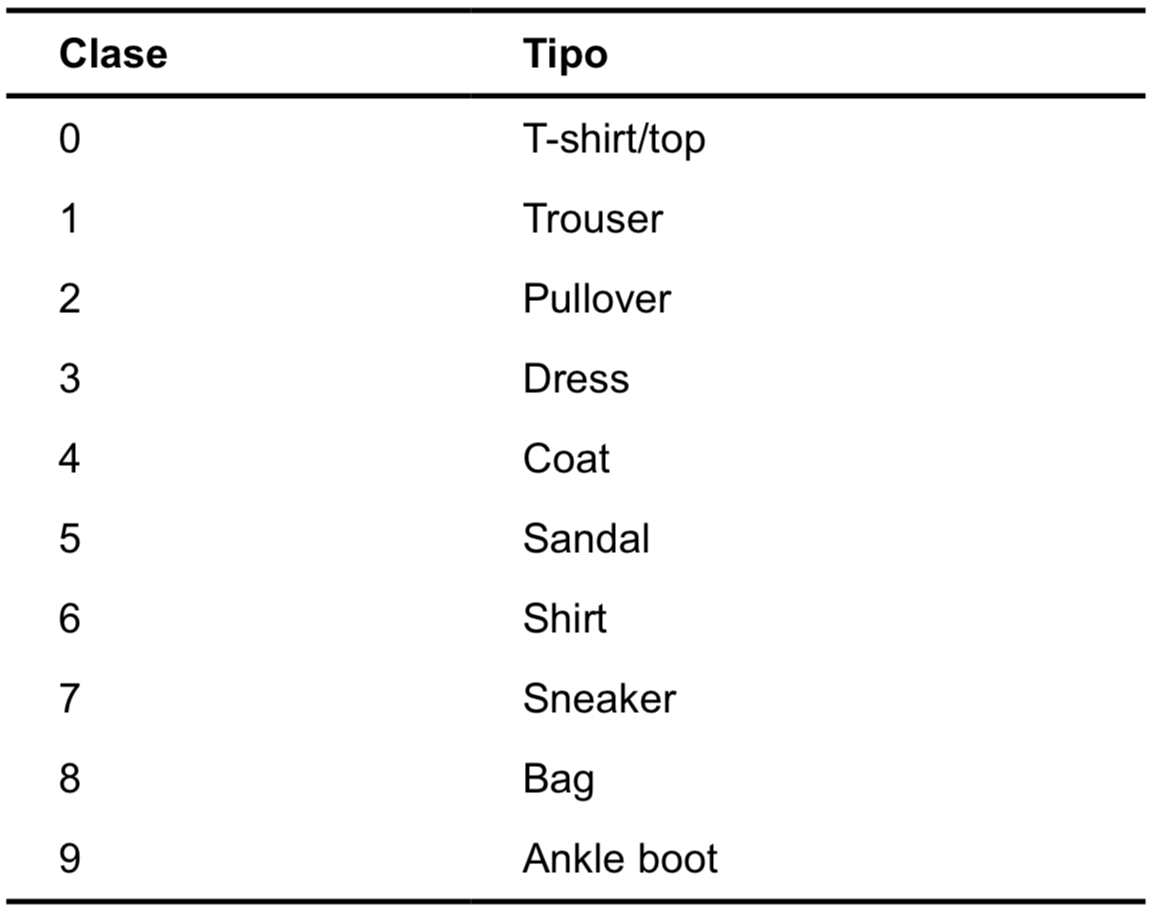

### Dado que los nombres de clase no se incluyen con el conjunto de datos, podemos crear una lista con ellos para usarlos más adelante al visualizar las imágenes:

In [5]:
# Clases de ropa consideradas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Vamos a escalar los valores de entrada en el rango 0-1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


In [7]:
# Recordar que es una buena práctica comprobar que los datos tienen la forma que esperamos

print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [8]:
# y que las muestras y etiquetas son los valores que esperamos
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

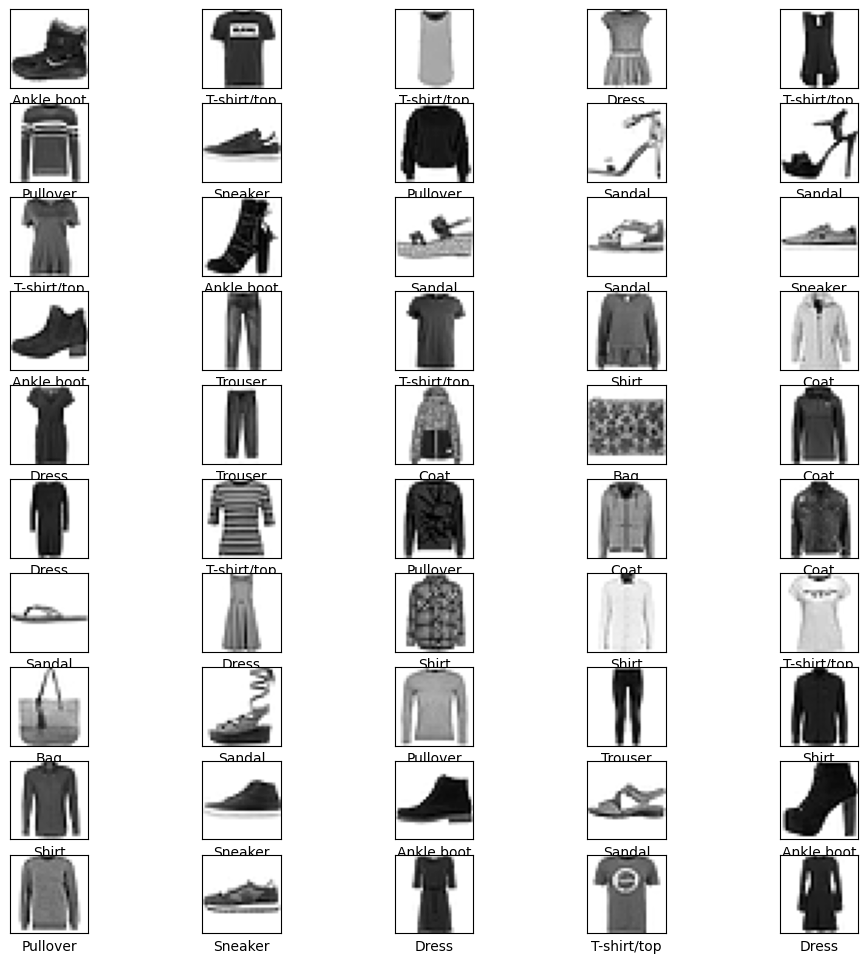

In [9]:
# Visualización las 50 primeras imágenes del conjunto de datos Fashion-MNIST
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Paso 2: Definimos la arquitectura de la red neuronal**

Tened en cuenta que Keras nos facilita el paso de reconvertir las muestras de entrada de 28×28 a un vector (array) de 784 números (concatenando fila a fila) con el uso de la capa *keras.layers.Flatten()*. Podemos comprobar con el método *summary()* que esta capa no requiere parámetros para aplicar la transformación (columna Param #). En general, siempre usaremos esta capa del modelo para hacer esta operación en lugar de redimensionar el tensor de datos antes de la entrada.


In [10]:
# Cargamos las librerías necesarias para configurar la red
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

In [11]:
# Definimos la arquitectura de la red utilizada
model = Sequential()

#Comenzamos aplanando la imagen de 28x28 en un vector de 28*28 
model.add(Flatten(input_shape=(28, 28)))

# Primera capa densa
model.add(Dense(10, activation='sigmoid'))

# 10 nodos de salida, uno para cada posible categoría
model.add(Dense(10, activation='softmax'))


c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Hacemos un summary de la red considerada
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

**Paso 3: Compilamos la arquitectura de la red neuronal definida**

Antes de que el modelo esté listo para ser entrenado, se requiere especificar el valor de algunos argumentos del método de compilación. Los parámetros que utilizamos son los conocidos para este tipo de problemas de clasificación multiclase. En particular, recordar que en este paso se especifica la función de coste (loss) que dirige el entrenamiento del modelo en la dirección correcta durante el proceso de entrenamiento. También especificamos el tipo de optimización que usaremos para actualizar los parámetros del modelo durante el proceso de aprendizaje. Y, finalmente, se indica la métrica que se usará para monitorizar los pasos de entrenamiento y testing. En este ejercicio nuevamente proponemos usar la precisión (accuracy), es decir, la fracción de las imágenes que están clasificadas correctamente.

In [13]:
# Compilamos el modelo con SGD
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Paso 4: Entrenamiento del modelo de red neuronal utilizado**

Ahora el modelo ya está listo para entrenar mediante el método fit(), actualizando los parámetros de tal manera que aprenda a asociar imágenes a etiquetas. Como se puede observar, a medida que el modelo entrena, se muestran las métricas de loss y accuracy.

En este caso (pueden cambiar los valores cuando ustedes lo probéis) este modelo alcanza una precisión de, aproximadamente, 0.7951 (o 79.5 %) en los datos de entrenamiento, pasando todas las imágenes por la red neuronal 5 veces (5 épocas, o epochs).

In [26]:
# Realizamos el proceso de entrenamiento sobre el conjunto de train
model.fit(train_images, train_labels, epochs=10)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8542 - loss: 0.4100
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8617 - loss: 0.3950
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8626 - loss: 0.3917
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.3837
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8661 - loss: 0.3748
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8656 - loss: 0.3806
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.3694
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8702 - loss: 0.3685
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3605
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8736 - loss: 0.3598
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8743 - loss: 0.3524
Epoch 12/15
1875/1875 ━━━━━━━━

**Paso 5: Evaluación del modelo de red neuronal utilizado**

El siguiente paso es comparar el rendimiento del modelo en el conjunto de datos de prueba. Vemos que es aproximadamente la misma precisión que en los datos de entrenamiento. Buenas noticias!! No existe el sobreajuste.

In [27]:
# Realizamos el proceso de validación sobre el conjunto de test con model.evaluate para obtener pérdida y accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8587 - loss: 0.4087


In [28]:
# Obtenemos por pantalla el resultado
print('Test accuracy:', test_acc)

Test accuracy: 0.8568999767303467


**Paso 6: Predicciones del modelo de red neuronal utilizado**

Con el modelo entrenado, podemos empezar a usarlo para hacer predicciones sobre algunas imágenes (usemos por comodidad alguna de las imágenes de prueba que ya tenemos cargadas en el notebook). En predictions vamos a almacenar la predicción de la etiqueta para cada imagen en el conjunto de prueba. Echemos un vistazo a la primera predicción:

In [17]:
# Guardamos las predicciones realizadas sobre el conjunto de test
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [39]:
index = 5


# Obtenemos la información sobre una de las predicciones obtenidas
"""
Esto nos devuelve un array con las probabilidades asignadas a cada etiqueta. 
Como se puede comprobar, el índice[1] del array tiene una probabilidad del 82%.
"""
predictions[index]

array([2.0740531e-02, 8.2778382e-01, 2.4470164e-02, 7.1747534e-02,
       1.4751697e-02, 4.1172602e-03, 2.2895966e-02, 1.1890878e-02,
       8.4026915e-04, 7.6188176e-04], dtype=float32)

In [52]:
# Se puede ver qué etiqueta tiene el valor de confianza más alto con la función argmax

"""
argmax nos devuelve el índice de la etiqueta con la probabilidad más alta (para no tener que buscarlo manualmente).
"""
mas_probable = np.argmax(predictions[index])
print(mas_probable, '--->' ,class_names[mas_probable])
print ("valor real: ", test_labels[index])

1 ---> Trouser
valor real:  1


El modelo está más seguro de que esta imagen son unos pantalones (Trouser) ya que nos reporta una clase igual a 1. Al examinar la etiqueta que le corresponde muestra que esta clasificación es correcta ya que es igual a 1 también.

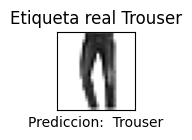

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [53]:
plt.figure(figsize=(12,12))

plt.subplot(10,5,index)
plt.title("Etiqueta real " + class_names[test_labels[index]])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.xlabel(f"Prediccion:  {class_names[mas_probable]}")
plt.show()
print(class_names)

**Paso 7: Mejora del modelo de red neuronal utilizado**

Podemos observar que la precisión obtenida de este modelo para estos datos (75 %) dista mucho de ser la mejor de las que podemos obtener. Tener en cuenta que no hay una solución única para todos los problemas, sino que cada problema requiere su propia solución. Intentemos, por ejemplo, cambiar el optimizador usado.

Recordemos que el optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. Una elección bastante habitual es el optimizador *sgd*, pero hay más como sabemos, como por ejemplo el optimizador *Adam*, que a veces puede hacer converger mejor el proceso de optimización. Vamos a probar.

In [23]:


#! CAMBIAR EL CÓDIGO

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compilamos el modelo de la red que queremos mejorar con ADAM
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Realizamos el proceso de entrenamiento sobre el conjunto de train considerando el nuevo modelo de red neuronal
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6131 - loss: 1.3869
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8109 - loss: 0.5882
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8357 - loss: 0.4775
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8454 - loss: 0.4423
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8499 - loss: 0.4214
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.4053
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8619 - loss: 0.3889
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3826
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8682 - loss: 0.3718
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8708 - loss: 0.3678
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3656
Epoch 12/50
1875/1875 ━━━━━━━━

In [19]:
# Realizamos el proceso de validación sobre el conjunto de test el nuevo modelo de red neuronal
test_loss, test_acc = model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.4211


In [20]:
# Obtenemos por pantalla el resultado
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8547999858856201


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8891 - loss: 0.3078 - val_accuracy: 0.8513 - val_loss: 0.4274
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8895 - loss: 0.3049 - val_accuracy: 0.8521 - val_loss: 0.4230
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8895 - loss: 0.3058 - val_accuracy: 0.8524 - val_loss: 0.4251
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3039 - val_accuracy: 0.8509 - val_loss: 0.4308
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8884 - loss: 0.3097 - val_accuracy: 0.8544 - val_loss: 0.4248
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8913 - loss: 0.3024 - val_accuracy: 0.8538 - val_loss: 0.4245
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3088 - val_accuracy: 0.8535 - val_loss: 0.4241
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8876 - loss: 0.3096 - 

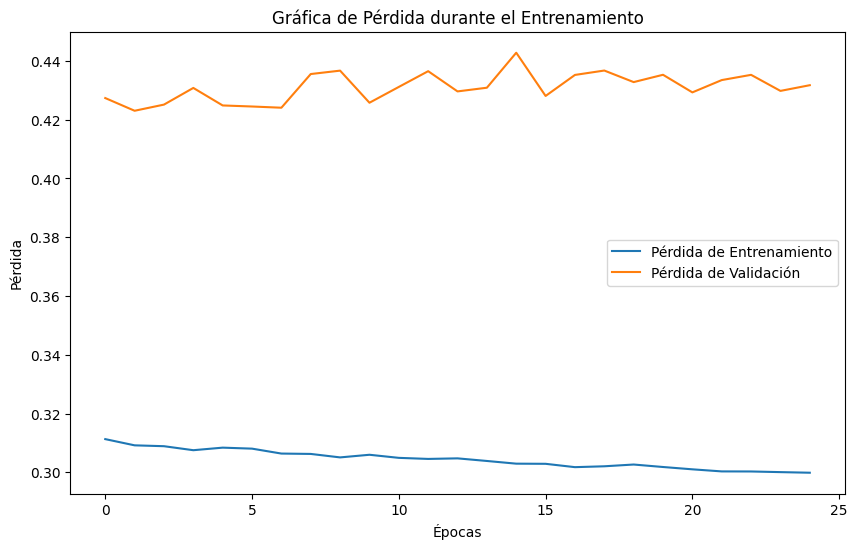

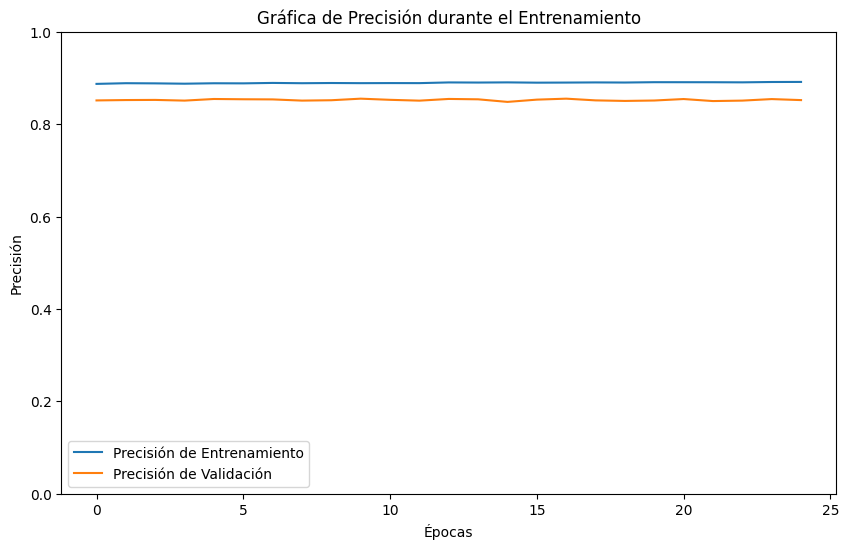

In [22]:
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=25)

# Graficar la pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Gráfica de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Gráfica de Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1]) 
plt.legend()
plt.show()

Como vemos, cambiando solo el optimizador ya hemos mejorado casi un 9 % adicional la precisión del modelo. Esto nos hace pensar que hay muchos elementos a tener en cuenta cuando definimos y configuramos el proceso de aprendizaje de una red neuronal. Lo cual nos ofrece motivación para continuar probando con diferentes parámetros e hiperparámetros en el proceso de aprendizaje y validación.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>